In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm

In [14]:
pwd

'/content/gdrive/MyDrive/ASU/Classes/SML/Medical-Data-Recognition/notebooks'

In [12]:
dataFrame = pd.read_csv('../data/stroke.csv')
dataFrame.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataFrame.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
dataFrame.shape

(5110, 12)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataFrame.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

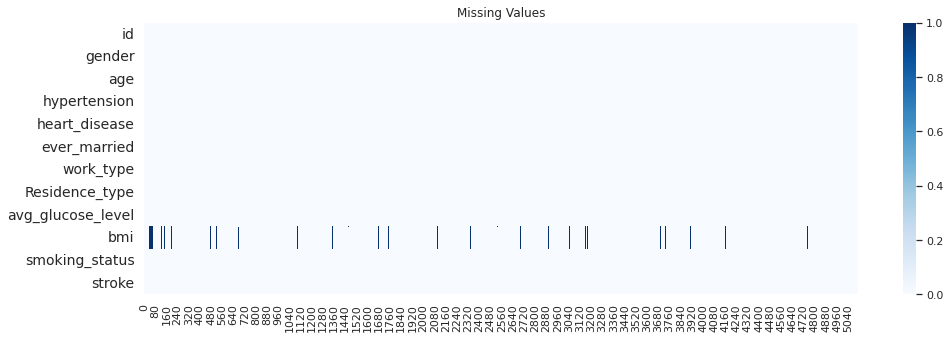

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

sns.heatmap(dataFrame.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

We are replacing BMI missing values with the average value. 

In [ ]:
dataFrame.bmi.replace(to_replace=np.nan, value=dataFrame.bmi.mean(),inplace=True)

## Data Visualization

In [ ]:
dataFrame=dataFrame.drop(columns = ['id'])

In [ ]:
dataFrame.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data_cor = dataFrame.corr()
data_cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


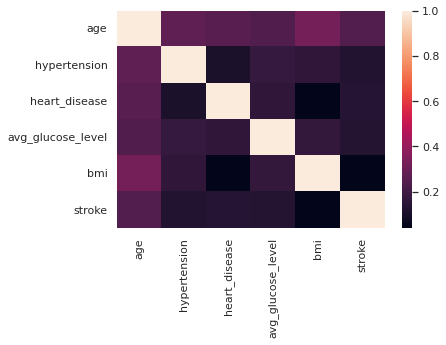

In [ ]:
sns.heatmap(data_cor)

(10.0, 100.0)

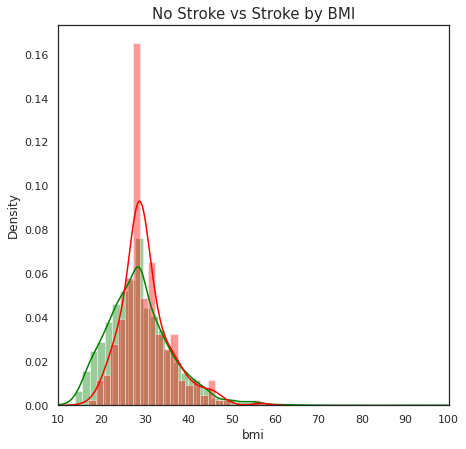

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(dataFrame[dataFrame['stroke'] == 0]['bmi'],color='green')
sns.distplot(dataFrame[dataFrame['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

(30.0, 330.0)

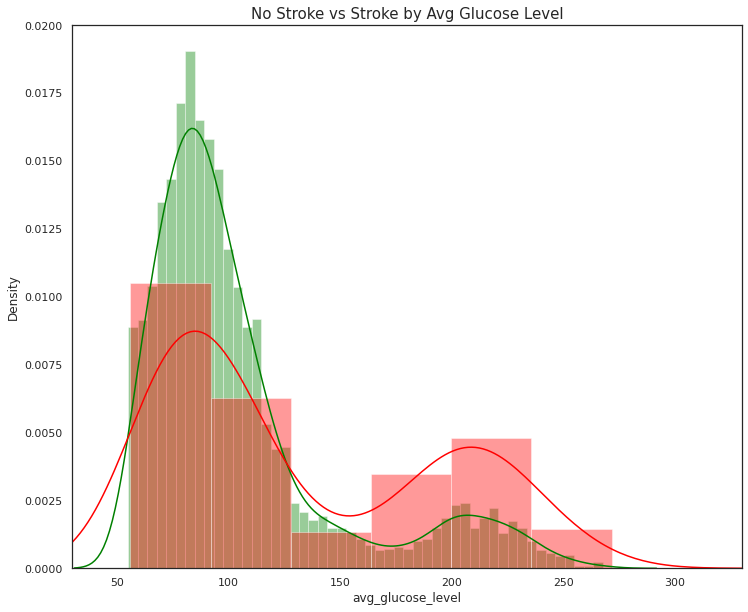

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(dataFrame[dataFrame['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(dataFrame[dataFrame['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])


(18.0, 100.0)

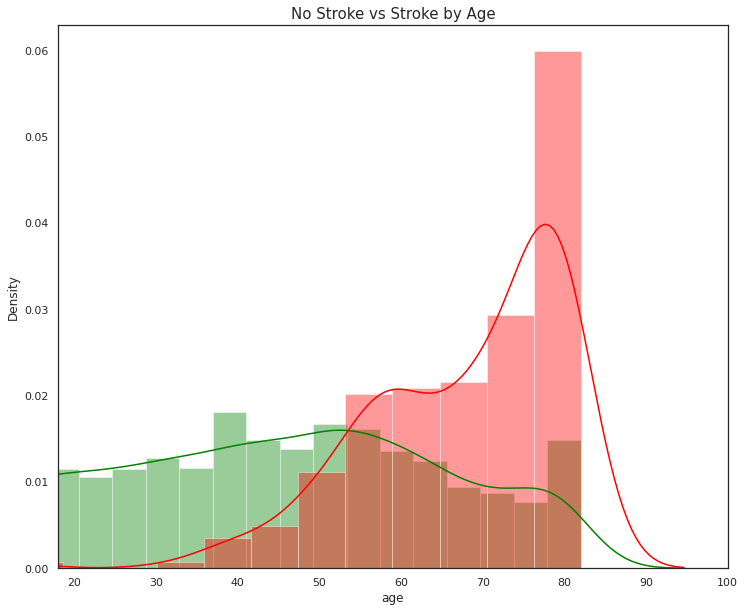

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(dataFrame[dataFrame['stroke'] == 0]['age'],color='green')
sns.distplot(dataFrame[dataFrame['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

## EDA New


In [ ]:
data = dataFrame

In [ ]:
# data.drop(columns = ['id'],inplace = True, axis=0)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)


Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


In [ ]:
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
type(text_data_features)

list

In [ ]:
le = LabelEncoder()
text_data_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|██████████| 7/7 [00:00<00:00, 213.46it/s]

gender  :  [1 0 2]  =  [1 0 2]
hypertension  :  [0 1]  =  [0 1]
heart_disease  :  [1 0]  =  [1 0]
ever_married  :  [1 0]  =  [1 0]
work_type  :  [2 3 0 4 1]  =  [2 3 0 4 1]
Residence_type  :  [1 0]  =  [1 0]
smoking_status  :  [1 2 3 0]  =  [1 2 3 0]


In [ ]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    print(l3[i],l4[i])
    for j,k in zip(l3[i],l4[i]):
      print(j, k)
      tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

[1, 0, 2] [1, 0, 2]
1 1
0 0
2 2
[0, 1] [0, 1]
0 0
1 1
[1, 0] [1, 0]
1 1
0 0
[1, 0] [1, 0]
1 1
0 0
[2, 3, 0, 4, 1] [2, 3, 0, 4, 1]
2 2
3 3
0 0
4 4
1 1
[1, 0] [1, 0]
1 1
0 0
[1, 2, 3, 0] [1, 2, 3, 0]
1 1
2 2
3 3
0 0


{'gender': {1: 1, 0: 0, 2: 2},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'},
 'ever_married': {1: 1, 0: 0},
 'work_type': {2: 2, 3: 3, 0: 0, 4: 4, 1: 1},
 'Residence_type': {1: 1, 0: 0},
 'smoking_status': {1: 1, 2: 2, 3: 3, 0: 0}}

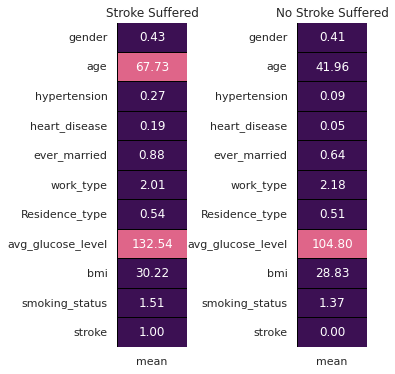

In [ ]:

stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)


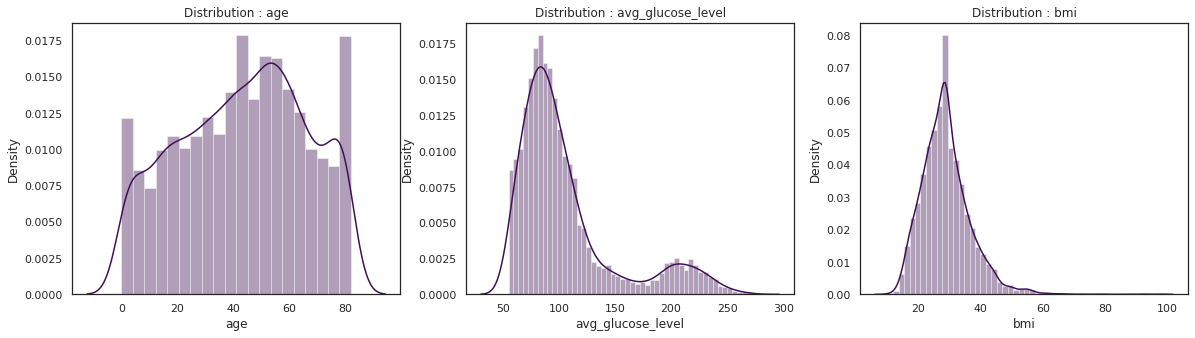

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()


AGe and avg_glucose level has strong indicator to identify stroke. 

In [ ]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|██████████| 5110/5110 [00:01<00:00, 5020.90it/s]

Total Number of Missing Values in bmi feature : 0


In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


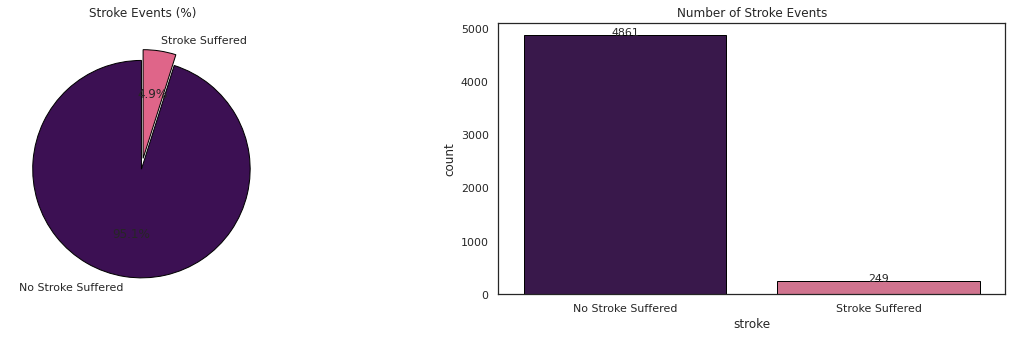

In [ ]:
df1 = data.copy(deep = True)


l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');

plt.subplot(1,2,2)
ax = sns.countplot('stroke',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()

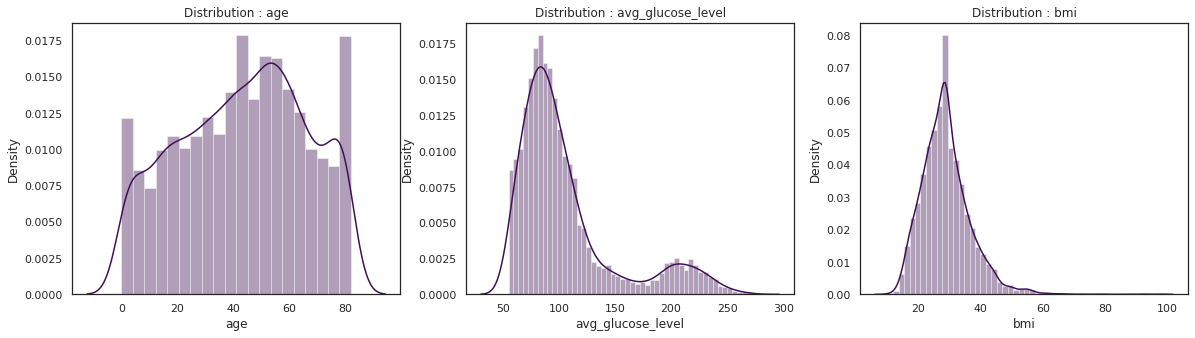

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i, col in enumerate(discrete_features):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[col],color = colors[0])
    title = 'Distribution : ' + col
    plt.title(title)
plt.show()

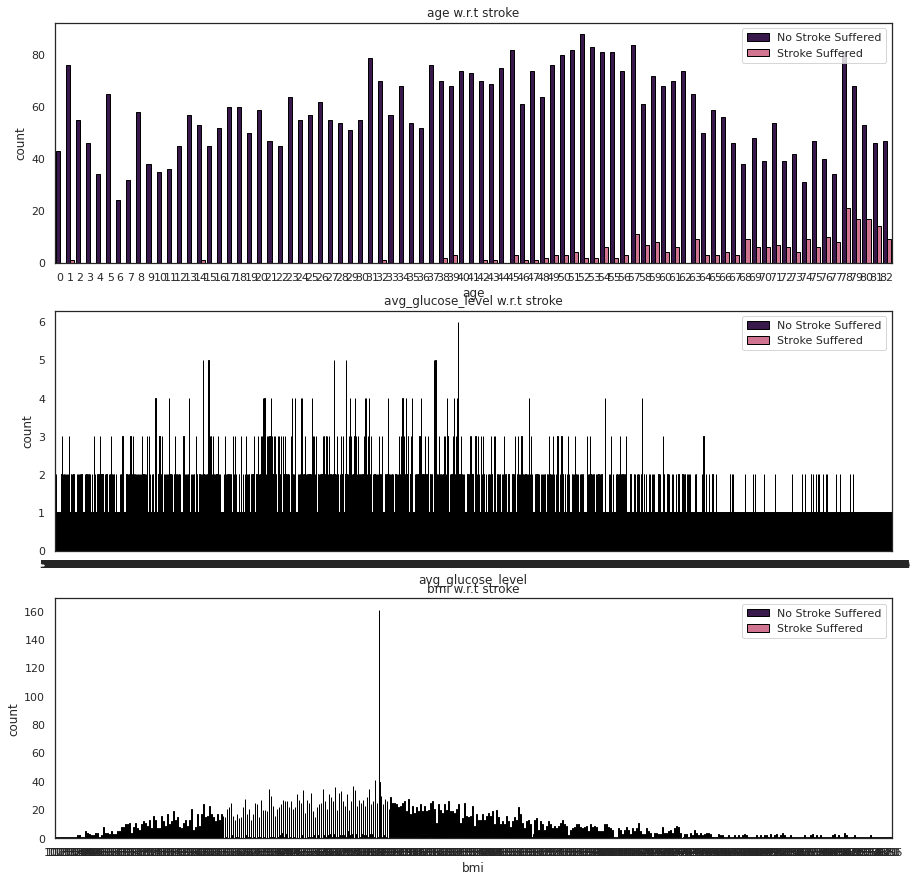

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(discrete_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(discrete_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = discrete_features[i] + ' w.r.t stroke'
    plt.title(title);

In [ ]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

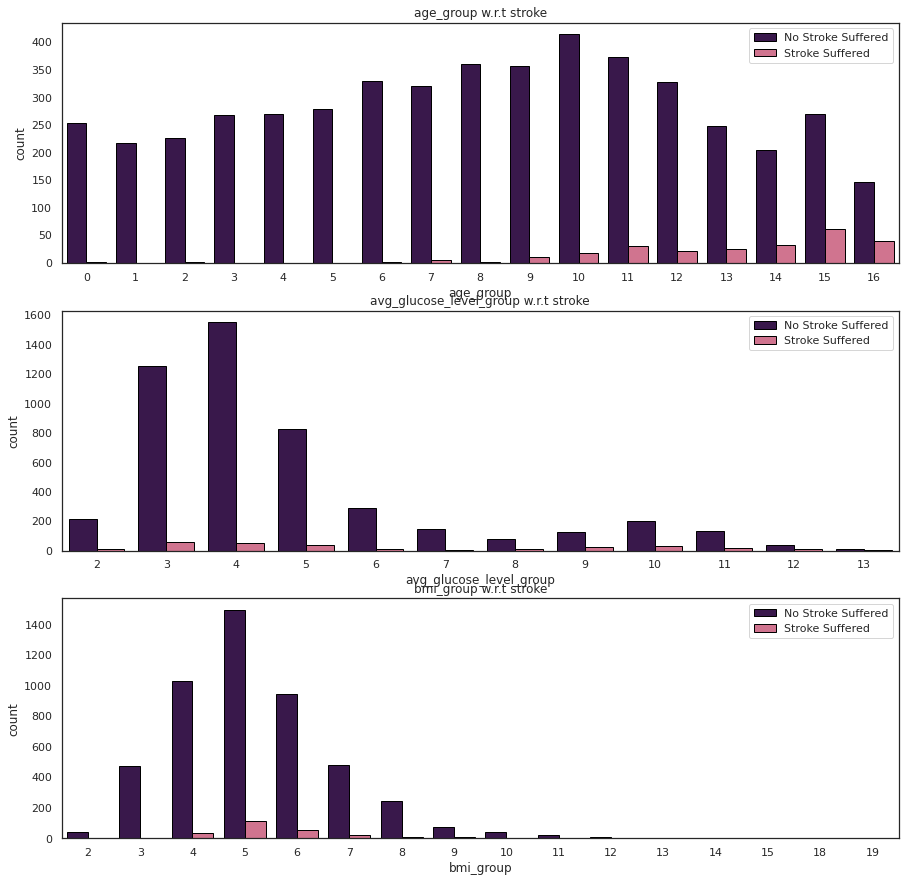

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);

#### categorical features

In [ ]:
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
text_data_features

In [ ]:
#categorical_features.remove('stroke')

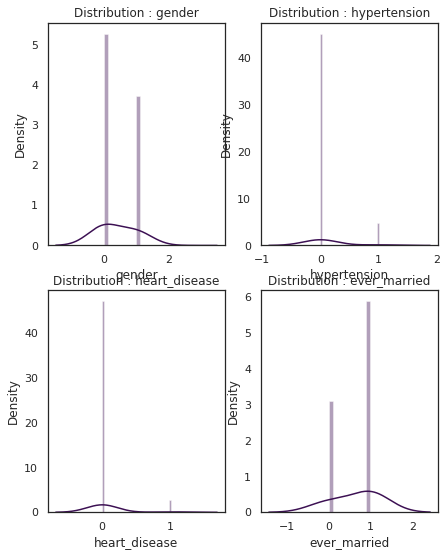

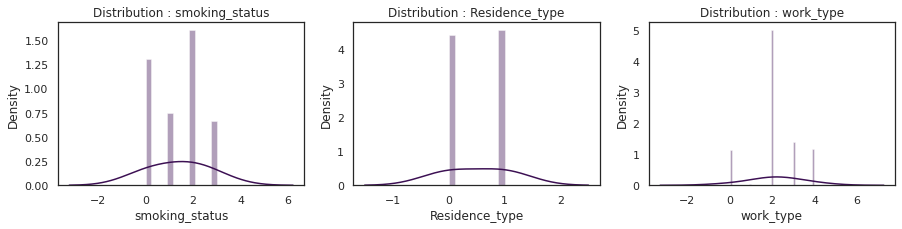

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(text_data_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[text_data_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + text_data_features[i]
    plt.title(title)
    
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[text_data_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + text_data_features[i]
    plt.title(title)

### Categorical Features w.r.t Target Variable (stroke)

In [ ]:
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

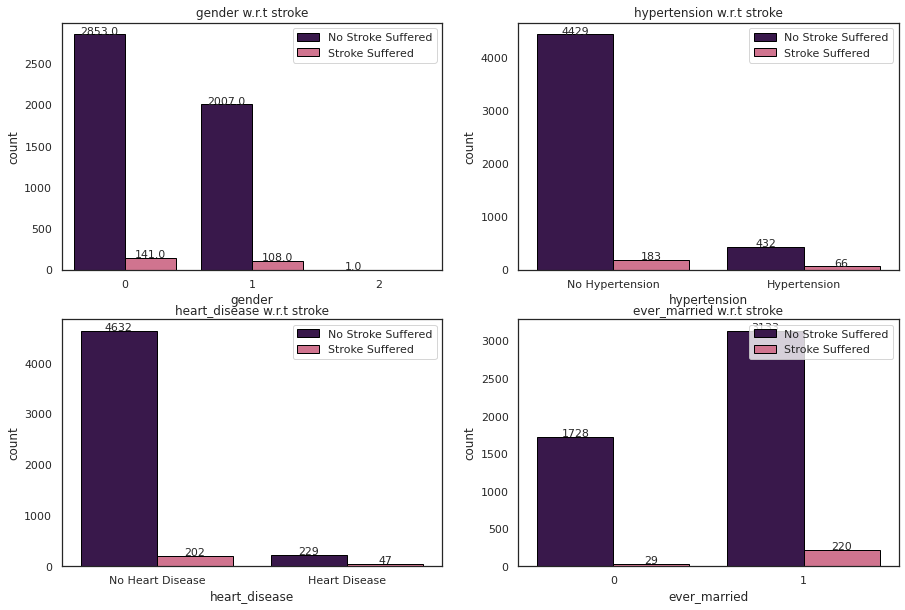

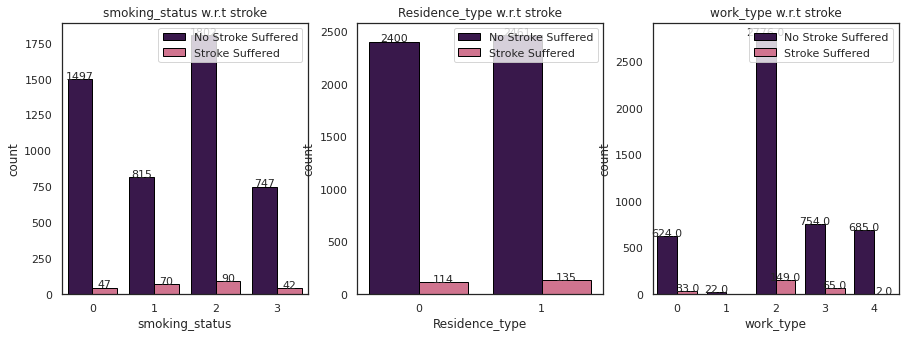

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

### Categorical Features w.r.t Positive Cases of stroke 

In [ ]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

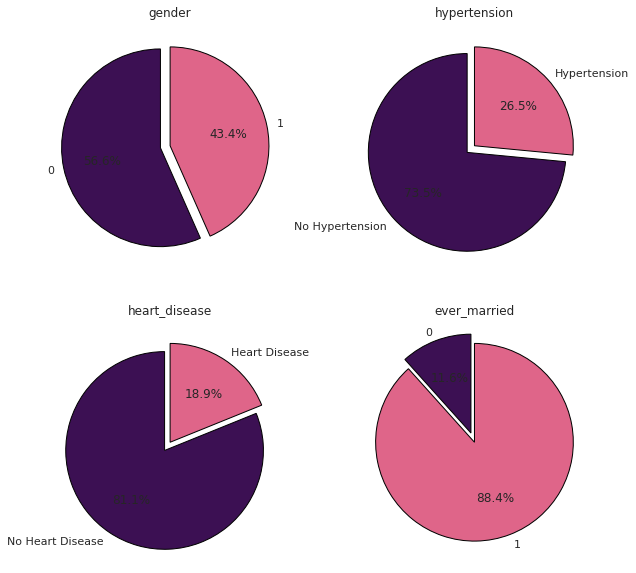

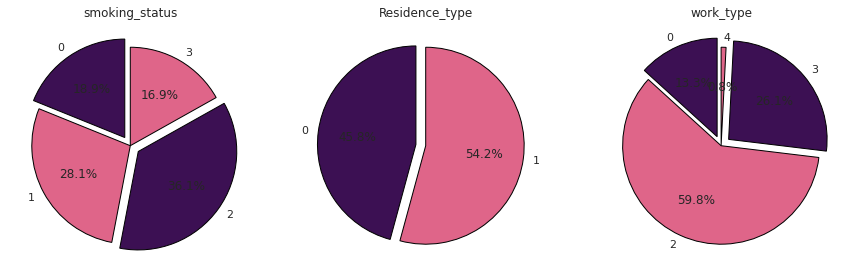

In [ ]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

## Data Preprocessing

In [ ]:
df = dataFrame

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 9)
Y Shape (5110,)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations     x_train',X_train.shape)
print('Number transations     x_test',X_test.shape)
print('Number transations     y_train',y_train.shape)
print('Number transations     y_test',y_test.shape)
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Number transations     x_train (4088, 9)
Number transations     x_test (1022, 9)
Number transations     y_train (4088,)
Number transations     y_test (1022,)
Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [ ]:
print('Number transations   x_train',X_train.shape)
print('Number transations   y_train',y_train.shape)
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Number transations   x_train (4088, 9)
Number transations   y_train (4088,)
Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling,   shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling,   shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling,   counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling,   counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling,   shape of train_x: (7786, 9)
After OverSampling,   shape of train_y: (7786,)
After OverSampling,   counts of label 1: 3893
After OverSampling,   counts of label 0: 3893


## Model Selection

In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])

### Without SMOTE

In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

    # k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)


    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    #print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    #print(classification_report(y_test, y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    # print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,precision)))
    # plot_roc_curve(model, X_test, y_test)


    print('-'*40)



    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.max()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
Accuracy Score:  0.9452054794520548

K-Fold Validation Mean Accuracy: 95.18 %

K-Fold Validation Max Accuracy: 95.59 %

Standard Deviation: 0.22 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.18 %

K-Fold Validation Max Accuracy: 95.35 %

Standard Deviation: 0.11 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

SVM :
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

K-Fold Validation Max Accuracy: 95.35 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.9422700587084148

K-Fold Validation Mean Accuracy: 94.62 %

K-Fold Validation Max Accuracy: 95.11 %

Standard Deviation: 0.39 %

R

In [ ]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2


,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
2,SVM,94.716243,95.229997,95.354523,0.120037,0.500000,0.000000,0.000000,0.000000
6,RandomForest,94.716243,95.181037,95.599022,0.219612,0.508743,0.500000,0.018519,0.035714
1,Logistic Regression,94.716243,95.181037,95.354523,0.111183,0.500000,0.000000,0.000000,0.000000
0,XGBClassifier,94.520548,95.181157,95.588235,0.217151,0.498967,0.000000,0.000000,0.000000
3,KNeigbors,94.227006,94.618450,95.110024,0.393495,0.506160,0.142857,0.018519,0.032787
5,DecisionTree,91.585127,91.218599,92.665037,1.025404,0.535927,0.136364,0.111111,0.122449
4,GaussianNB,88.356164,86.913203,88.970588,1.075873,0.667508,0.207207,0.425926,0.278788


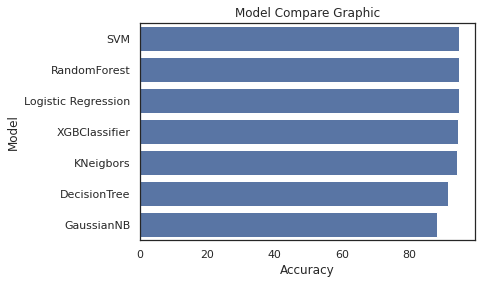

In [ ]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

### SMOTE

XGBClassifier :
Accuracy Score:  0.9412915851272016

K-Fold Validation Mean Accuracy: 96.02 %

K-Fold Validation Max Accuracy: 99.23 %

Standard Deviation: 7.08 %

ROC AUC Score: 0.51 %

Precision: 0.20 %

Recall: 0.04 %

F1 Score: 0.06 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.773972602739726

K-Fold Validation Mean Accuracy: 77.95 %

K-Fold Validation Max Accuracy: 81.90 %

Standard Deviation: 1.97 %

ROC AUC Score: 0.73 %

Precision: 0.15 %

Recall: 0.69 %

F1 Score: 0.24 %
----------------------------------------

SVM :
Accuracy Score:  0.7172211350293543

K-Fold Validation Mean Accuracy: 78.40 %

K-Fold Validation Max Accuracy: 81.51 %

Standard Deviation: 1.80 %

ROC AUC Score: 0.75 %

Precision: 0.13 %

Recall: 0.78 %

F1 Score: 0.23 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.8170254403131115

K-Fold Validation Mean Accuracy: 88.94 %

K-Fold Validation Max Accuracy: 91.01 %

Standard Deviation: 1.11 %

RO

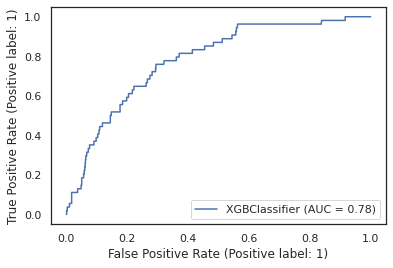

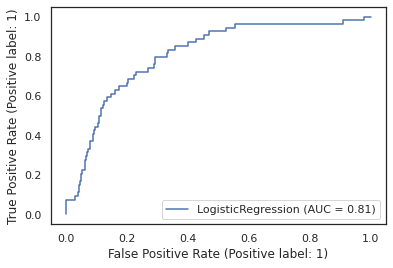

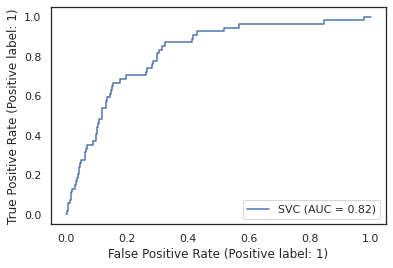

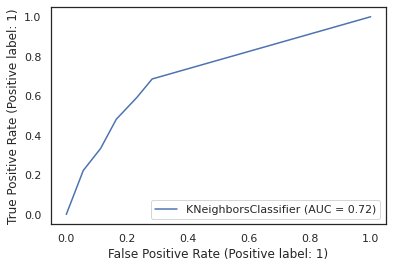

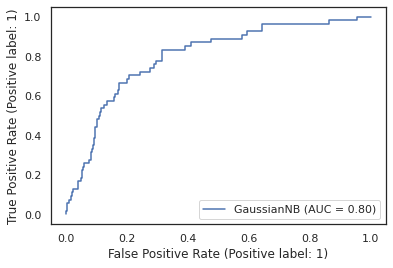

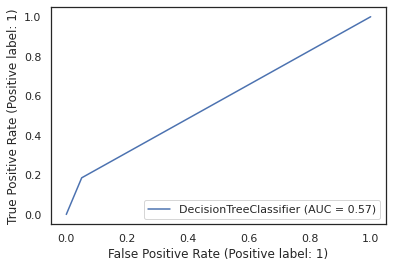

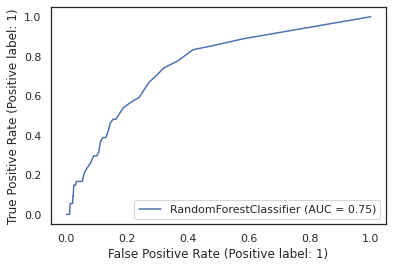

In [ ]:
lsts_1 = []
for m in range(len(models)):
    lsts_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    #cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

    # k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    #print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    #print(classification_report(y_test, y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))

    plot_roc_curve(model, X_test, y_test)
    print('-'*40)
    print('')
    lsts_2.append(models[m][0])
    lsts_2.append(accuracy_score(y_test,y_pred)*100)
    lsts_2.append(accuracies.mean()*100)
    lsts_2.append(accuracies.max()*100)
    lsts_2.append(accuracies.std()*100)
    lsts_2.append(roc)
    lsts_2.append(precision)
    lsts_2.append(recall)
    lsts_2.append(f1)
    lsts_1.append(lsts_2)

In [ ]:
dfs2 = pd.DataFrame(lsts_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

dfs2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
dfs2

,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
6,RandomForest,94.227006,97.021394,99.486521,6.499430,0.497417,0.000000,0.000000,0.000000
0,XGBClassifier,94.129159,96.019632,99.228792,7.079656,0.514386,0.200000,0.037037,0.062500
5,DecisionTree,90.900196,94.388379,97.943445,5.618259,0.567283,0.169492,0.185185,0.176991
3,KNeigbors,81.702544,88.941428,91.014121,1.106935,0.658613,0.140541,0.481481,0.217573
1,Logistic Regression,77.397260,77.947190,81.899872,1.971927,0.732055,0.147410,0.685185,0.242623
4,GaussianNB,74.755382,78.782369,82.156611,1.941983,0.735595,0.138298,0.722222,0.232143
2,SVM,71.722114,78.396930,81.514763,1.796819,0.745810,0.131661,0.777778,0.225201


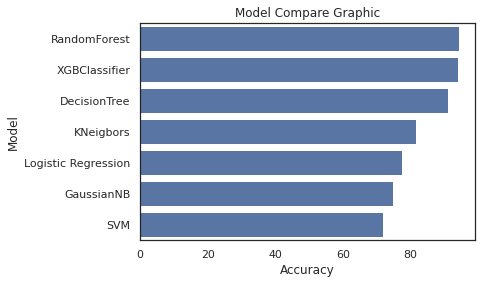

In [ ]:
sns.barplot(x='Accuracy',y='Model',data=dfs2,color='b')
plt.title('Model Compare Graphic');

## Model Tuning

In [ ]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print(' {}: \n Best Parameters: {} %'.format(i,best_param))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(): 
 Best Accuracy: 96.02 %
 XGBClassifier(): 
 Best Parameters: {'eval_metric': 'error', 'learning_rate': 0.1} %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 90.23 %
 KNeighborsClassifier(): 
 Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5} %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 94.85 %
 DecisionTreeClassifier(): 
 Best Parameters: {'criterion': 'entropy', 'random_state': 0} %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 97.16 %
 RandomForestClassifier(): 
 Best Parameters: {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0} %

-------------------------



### Using the Best with the best parameters

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.90      0.94      0.92      1022

ROC AUC score: 0.7705941995714723
Accuracy Score:  0.9412915851272016


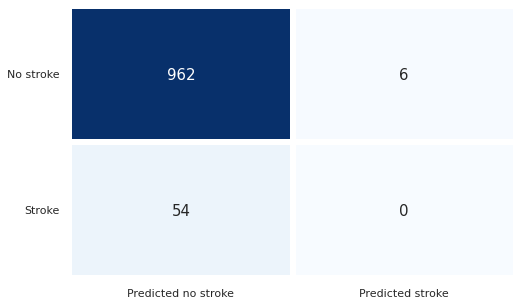

Text(0.5, 0, 'False Positive Rate')

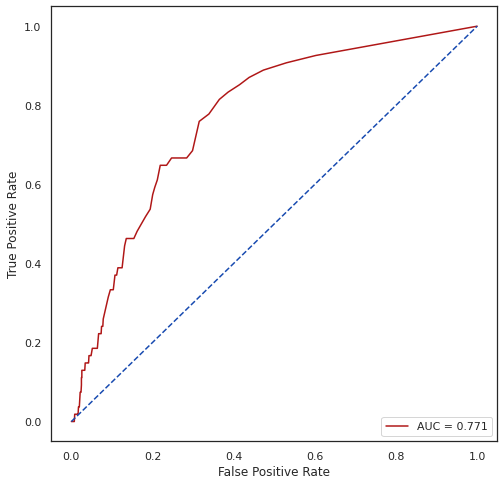

In [ ]:
# n_estimators
classifier = RandomForestClassifier(random_state=0, n_estimators=200, criterion='entropy')

# classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')